In [ ]:
import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras_video import VideoFrameGenerator
import numpy as np

In [ ]:
# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('Dataset/*')]
classes.sort()

# Some global params
SIZE = (224, 224)    # Image size
CHANNELS = 3         # Color channel
NBFRAME = 30         # Frames per video
BS = 2               # Batch size

# Pattern to get videos and classes
glob_pattern = 'Dataset/{classname}/*.mp4'

# For data augmentation
data_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split_val=.20,
    split_test=.20, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=None, # Data Augmentation
    use_frame_cache=False)

class Agem_Kanan, validation count: 24, test count: 19, train count: 77
class Agem_Kiri, validation count: 24, test count: 19, train count: 77
class Ngegol, validation count: 24, test count: 19, train count: 77
class Nyalud, validation count: 24, test count: 19, train count: 77
class Nyeregseg, validation count: 24, test count: 19, train count: 77
class Seledet, validation count: 24, test count: 19, train count: 77
class Ulap_Ulap, validation count: 24, test count: 19, train count: 77
Total data: 7 classes for 539 files for train


In [ ]:
valid = train.get_validation_generator()
test = train.get_test_generator()

Total data: 7 classes for 168 files for validation
Total data: 7 classes for 133 files for test


In [ ]:
train.next()[0]

array([[[[[0.2509804 , 0.3137255 , 0.47058827],
          [0.2509804 , 0.3137255 , 0.47058827],
          [0.24705884, 0.30980393, 0.4666667 ],
          ...,
          [0.27058825, 0.4039216 , 0.67058825],
          [0.28235295, 0.4156863 , 0.68235296],
          [0.2784314 , 0.41176474, 0.6784314 ]],

         [[0.24313727, 0.30588236, 0.46274513],
          [0.24705884, 0.30980393, 0.4666667 ],
          [0.2509804 , 0.3137255 , 0.47058827],
          ...,
          [0.27450982, 0.40784317, 0.6745098 ],
          [0.28627452, 0.41960788, 0.6862745 ],
          [0.2784314 , 0.41176474, 0.6784314 ]],

         [[0.2509804 , 0.3137255 , 0.47058827],
          [0.2509804 , 0.3137255 , 0.47058827],
          [0.25490198, 0.31764707, 0.47450984],
          ...,
          [0.2784314 , 0.41176474, 0.6784314 ],
          [0.28235295, 0.4156863 , 0.68235296],
          [0.27450982, 0.40784317, 0.6745098 ]],

         ...,

         [[0.6392157 , 0.63529414, 0.64705884],
          [0.6431373 ,

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, LSTM, Dense, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
input_shape = (NBFRAME,) + SIZE + (CHANNELS,)

In [ ]:
# Define VGG16 model
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape[1:])
model_vgg16.trainable = False

model = Sequential()

model.add(TimeDistributed(model_vgg16, input_shape=input_shape))
model.add(TimeDistributed(GlobalAveragePooling2D()))

# Define LSTM model
model.add(LSTM(256))

# Dense layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(int(len(classes)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 30, 7, 7, 512)     14714688  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 512)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 1024)              263168    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 7175      
Total params: 15,772,487
Trainable params: 1,057,799
Non-trainable params: 14,714,688
____________________________________

In [ ]:
epochs = 100

earlystop = EarlyStopping(monitor='loss', patience=10)

callbacks = [earlystop]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(train,
                    validation_data=valid,
                    epochs=epochs,
                    callbacks=callbacks)

Epoch 1/100
269/269 [==============================] - 171s 552ms/step - loss: 1.8639 - acc: 0.2119 - val_loss: 1.5465 - val_acc: 0.3036
Epoch 2/100
269/269 [==============================] - 148s 548ms/step - loss: 1.5570 - acc: 0.2676 - val_loss: 1.5396 - val_acc: 0.2857
Epoch 3/100
269/269 [==============================] - 148s 548ms/step - loss: 1.5696 - acc: 0.2824 - val_loss: 1.5461 - val_acc: 0.2857
Epoch 4/100
269/269 [==============================] - 148s 548ms/step - loss: 1.5264 - acc: 0.3153 - val_loss: 1.5578 - val_acc: 0.2679
Epoch 5/100
269/269 [==============================] - 148s 548ms/step - loss: 1.3629 - acc: 0.3716 - val_loss: 1.3326 - val_acc: 0.4048
Epoch 6/100
269/269 [==============================] - 148s 548ms/step - loss: 1.3115 - acc: 0.3974 - val_loss: 1.3450 - val_acc: 0.3810
Epoch 7/100
269/269 [==============================] - 148s 549ms/step - loss: 1.3702 - acc: 0.3723 - val_loss: 1.2612 - val_acc: 0.4464
Epoch 8/100
269/269 [====================

In [ ]:
model.save('Model/tari/vgg16-lstm-224.h5')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

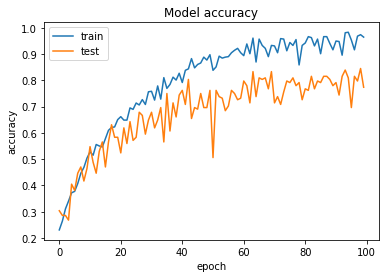

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

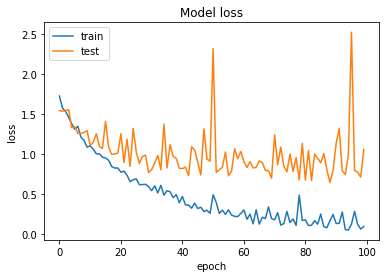

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(test)

66/66 [==============================] - 28s 415ms/step - loss: 0.4246 - acc: 0.8939


[0.4245873987674713, 0.8939393758773804]

In [ ]:
y_test = []
y_predict = []
for step in range(test.files_count//BS):
    X, y = test.next()
    prediction = model.predict(X)
    y_test.extend(y)
    y_predict.extend(prediction)

In [ ]:
y_true = np.argmax(y_test, axis=1)
prediction = np.argmax(y_predict, axis=1)

In [ ]:
y_true

array([1, 2, 6, 2, 5, 6, 5, 5, 4, 1, 4, 0, 6, 4, 2, 3, 2, 4, 6, 1, 0, 5,
       4, 1, 0, 3, 6, 6, 6, 4, 3, 3, 0, 4, 5, 1, 3, 4, 1, 0, 4, 3, 0, 4,
       1, 2, 6, 1, 6, 4, 0, 4, 6, 4, 6, 3, 0, 5, 2, 5, 3, 5, 6, 2, 1, 2,
       1, 6, 1, 3, 2, 5, 5, 0, 5, 2, 2, 4, 3, 0, 0, 1, 2, 0, 3, 1, 2, 2,
       5, 3, 4, 0, 6, 5, 1, 4, 0, 1, 1, 6, 3, 3, 5, 0, 4, 2, 2, 0, 6, 3,
       1, 2, 6, 0, 3, 3, 2, 6, 3, 0, 3, 4, 4, 1, 5, 5, 5, 6, 0, 5, 2, 1])

In [ ]:
prediction

array([1, 2, 6, 2, 5, 6, 5, 5, 4, 1, 4, 0, 6, 4, 2, 3, 2, 4, 6, 1, 0, 5,
       4, 1, 0, 3, 3, 2, 6, 4, 3, 3, 1, 4, 5, 0, 3, 4, 1, 2, 4, 3, 0, 4,
       1, 2, 6, 1, 6, 4, 1, 6, 6, 4, 6, 3, 0, 5, 2, 5, 3, 5, 6, 2, 1, 2,
       1, 6, 1, 3, 2, 5, 5, 0, 5, 2, 2, 4, 1, 0, 1, 1, 2, 4, 3, 0, 2, 2,
       5, 3, 4, 2, 6, 5, 1, 4, 0, 1, 1, 6, 3, 3, 5, 0, 4, 2, 2, 0, 6, 3,
       3, 2, 6, 0, 3, 6, 2, 6, 3, 0, 3, 4, 4, 1, 5, 5, 5, 6, 0, 5, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, \
roc_curve, auc

In [ ]:
target_names = test.classes
print(classification_report(y_true, prediction, target_names=target_names))

              precision    recall  f1-score   support

  Agem_Kanan       0.87      0.68      0.76        19
   Agem_Kiri       0.80      0.84      0.82        19
      Ngegol       0.86      1.00      0.93        19
      Nyalud       0.89      0.89      0.89        19
   Nyeregseg       0.95      0.95      0.95        19
     Seledet       1.00      1.00      1.00        18
   Ulap_Ulap       0.89      0.89      0.89        19

    accuracy                           0.89       132
   macro avg       0.90      0.89      0.89       132
weighted avg       0.89      0.89      0.89       132



In [ ]:
matrix = confusion_matrix(y_true, prediction)
matrix

array([[13,  3,  2,  0,  1,  0,  0],
       [ 2, 16,  0,  1,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0],
       [ 0,  1,  0, 17,  0,  0,  1],
       [ 0,  0,  0,  0, 18,  0,  1],
       [ 0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  1,  1,  0,  0, 17]])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, prediction)
print(f'Accuracy: {accuracy}')
# precision tp / (tp + fp)
precision = precision_score(y_true, prediction, average='macro')
print(f'Precision: {precision}')
# recall: tp / (tp + fn)
recall = recall_score(y_true, prediction, average='macro')
print(f'Recall: {recall}')
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, prediction, average='macro')
print(f'F1 score: {f1}')

Accuracy: 0.8939393939393939
Precision: 0.8953064479380268
Recall: 0.894736842105263
F1 score: 0.8926985823459432


In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, prediction, pos_label=6)
auc = auc(fpr, tpr)

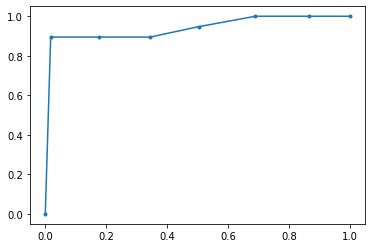

In [ ]:
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
pred = model.predict(test)

In [ ]:
pred_max = np.argmax(pred, axis=1)
len(pred_max)

132

In [ ]:
pred_max

array([0, 4, 1, 2, 0, 6, 5, 0, 3, 4, 1, 2, 2, 6, 1, 3, 0, 6, 5, 1, 5, 4,
       0, 3, 1, 2, 5, 1, 1, 1, 4, 0, 5, 6, 2, 4, 4, 4, 0, 4, 4, 3, 6, 0,
       1, 0, 4, 5, 4, 5, 2, 2, 2, 1, 6, 3, 2, 6, 3, 6, 6, 5, 3, 2, 6, 4,
       1, 3, 4, 3, 6, 6, 1, 0, 3, 5, 3, 6, 5, 1, 0, 3, 5, 2, 4, 1, 0, 5,
       2, 4, 1, 2, 3, 1, 3, 4, 3, 2, 6, 0, 2, 2, 2, 5, 1, 5, 0, 4, 4, 6,
       3, 6, 2, 1, 1, 2, 5, 2, 4, 1, 6, 5, 5, 2, 6, 3, 5, 3, 3, 0, 2, 6])